# Vectorization and Advanced Numpy functions

## NumPy Vectorization
NumPy vectorization is the process of performing operations on entire arrays or collections of data without the need for explicit loops in Python. This capability is one of the key features that make NumPy highly efficient and suitable for large-scale numerical computations.


NumPy supports vectorization, enabling a single operation to be performed on an entire array without the need for explicit loops over individual array elements. Let’s consider an example that compares element-wise addition using core Python and NumPy.

In [ ]:
# Element-wise addition in Python
x = [i for i in range(10000000)]
y = [i for i in range(10000000, 20000000)]
summation = []

import time
start = time.time()
for i in range(len(x)):
    summation.append(x[i] + y[i])
end = time.time()

python_total = end - start
print(f"Python took {python_total:.3f} seconds")

Python took 4.596 seconds


**At each step of this loop, Python has to do the following:**

1. Dereference summation (by "dereference" we mean find the place in memory that is associated with the variable summation and read the data there)
2. Determine the data type of summation(in this case, it's an integer).
3. Dereference `i`
4. Determine the data type of `i`(in this case, it's an integer).
5. Lookup how it should interpret operator `+` given in that append.
6. Compile low-level binary code (referred to as "machine code") that can be read by the computer's processor to tell it to execute an addition of two integers AND to also check and make sure that the operation won't cause an integer overflow. That's another operation!.
7. Run that code.

As you can see, there's alot going on in that simple line of code, and that process has to repeat every step of the loop.

In [ ]:
# Element-wise addition using NumPy
import numpy as np

x = np.arange(10000000)
y = np.arange(10000000, 20000000)

start = time.time()
z = x + y
end = time.time()

numpy_total = end - start
print(f"NumPy took {numpy_total:.3f} seconds")

NumPy took 0.035 seconds


In [ ]:
print(f"Numpy was {python_total / numpy_total:.1f}x faster!")

Numpy was 132.7x faster!


## Array Manipulations
NumPy offers an array of functions for manipulating arrays. These functions enable stacking, concatenation, and appending of arrays along different axes. They provide intuitive ways to organize data into higher dimensions or merge datasets.

### Stacking
Stacking involves placing arrays on top of each other or alongside each other to create a new array with an additional dimension. The stacked array will always have one more dimension than the input arrays.


In [ ]:
# Stacking 1D arrays (default axis=0)
a = np.arange(4)
b = np.arange(4)
c = np.stack((a, b))  # Stacking along the 0th axis
print(c, c.shape)

[[0 1 2 3]
 [0 1 2 3]] (2, 4)


In [ ]:
# Stacking 1D arrays along axis=1
c = np.stack((a, b), axis=1)
print(c, c.shape)

[[0 0]
 [1 1]
 [2 2]
 [3 3]] (4, 2)


In [ ]:
# Stacking multiple 2D arrays
a = np.arange(6).reshape(2, 3)
b = np.arange(6, 12).reshape(2, 3)
c = np.stack((a, b))
print(c, c.shape)

[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]] (2, 2, 3)


In [ ]:
# Vertically stack 1D arrays
a = np.arange(4)
b = np.arange(4, 8)
c = np.vstack((a, b))
print(c, c.shape)

[[0 1 2 3]
 [4 5 6 7]] (2, 4)


In [ ]:
# Vertically stack 2D arrays
a = np.arange(6).reshape(2, 3)
b = np.arange(6, 12).reshape(2, 3)
c = np.vstack((a, b))
print(c, c.shape)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]] (4, 3)


In [ ]:
# Horizontally stack 1D arrays
a = np.arange(4)
b = np.arange(4, 8)
c = np.hstack((a, b))
print(c, c.shape)

[0 1 2 3 4 5 6 7] (8,)


In [ ]:
# Horizontally stack 2D arrays
a = np.arange(6).reshape(2, 3)
b = np.arange(6, 12).reshape(2, 3)
c = np.hstack((a, b))
print(c, c.shape)

[[ 0  1  2  6  7  8]
 [ 3  4  5  9 10 11]] (2, 6)


In [ ]:
# Depth stack 2D arrays
a = np.arange(6).reshape(2, 3)
b = np.arange(6, 12).reshape(2, 3)
c = np.dstack((a, b))
print(c, c.shape)

[[[ 0  6]
  [ 1  7]
  [ 2  8]]

 [[ 3  9]
  [ 4 10]
  [ 5 11]]] (2, 3, 2)


### Concatenation
Concatenation merges arrays along an existing axis (does not create a new dimension). Input arrays must have compatible shapes.


In [ ]:
# Concatenate 1D arrays
a = np.arange(4)
b = np.arange(4, 8)
c = np.concatenate((a, b))
print(c, c.shape)

[0 1 2 3 4 5 6 7] (8,)


In [ ]:
# Concatenate 2D arrays along axis=0
a = np.arange(6).reshape(2, 3)
b = np.arange(6, 12).reshape(2, 3)
c = np.concatenate((a, b), axis=0)
print(c, c.shape)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]] (4, 3)


In [ ]:
# Concatenate 2D arrays along axis=1
c = np.concatenate((a, b), axis=1)
print(c, c.shape)

[[ 0  1  2  6  7  8]
 [ 3  4  5  9 10 11]] (2, 6)


### Appending
np.append adds elements to the end of an array. Unlike np.concatenate, it flattens the arrays by default unless an axis is specified.


In [ ]:
# Append elements to 1D array
a = np.arange(4)
b = np.arange(4, 8)
c = np.append(a, b)
print(c, c.shape)

[0 1 2 3 4 5 6 7] (8,)


In [ ]:
# Append to a 2D array along axis=0
a = np.arange(6).reshape(2, 3)
b = np.arange(6, 12).reshape(2, 3)
c = np.append(a, b, axis=0)
print(c, c.shape)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]] (4, 3)


In [ ]:
# Append to a 2D array along axis=1
a = np.arange(6).reshape(2, 3)
b = np.arange(6, 12).reshape(2, 3)
c = np.append(a, b, axis=1)
print(c, c.shape)

[[ 0  1  2  6  7  8]
 [ 3  4  5  9 10 11]] (2, 6)


### Splitting Arrays
Splitting arrays in NumPy is the reverse operation of joining. While joining combines multiple arrays into one, splitting breaks a single array into multiple sub-arrays. This operation doesn’t alter the original data and creates views of the array.


In [ ]:
# Create a 1D array
arr = np.array([1, 2, 3, 4, 5, 6])

# Split into 2 equal parts
newarr = np.split(arr, 2)
print("Split into 2 sections:\n", newarr)

# Split into 3 equal parts
newarr = np.split(arr, 3)
print("Split into 3 sections:\n", newarr)

Split into 2 sections:
 [array([1, 2, 3]), array([4, 5, 6])]
Split into 3 sections:
 [array([1, 2]), array([3, 4]), array([5, 6])]


In [ ]:
# Splitting Arrays Based on Unequal Sizes (np.split with Indices)

# Create a 1D array
arr1d = np.arange(1, 10)

# Split at indices 3 and 6
newarr = np.split(arr1d, [3, 6])
print("Split at indices [3, 6]:\n", newarr)

# Split at multiple indices
newarr = np.split(arr1d, [1, 3, 5, 7])
print("Split at indices [1, 3, 5, 7]:\n", newarr)

Split at indices [3, 6]:
 [array([1, 2, 3]), array([4, 5, 6]), array([7, 8, 9])]
Split at indices [1, 3, 5, 7]:
 [array([1]), array([2, 3]), array([4, 5]), array([6, 7]), array([8, 9])]


In [ ]:
# Splitting Multi-Dimensional Arrays
# Create a 2D array
arr2d = np.arange(12).reshape(4, 3)

# Split into 2 parts along rows (axis=0)
newarr = np.split(arr2d, 2, axis=0)
print("Split along rows:\n", newarr)

# Split into 3 parts along columns (axis=1)
newarr = np.split(arr2d, 3, axis=1)
print("Split along columns:\n", newarr)

Split along rows:
 [array([[0, 1, 2],
       [3, 4, 5]]), array([[ 6,  7,  8],
       [ 9, 10, 11]])]
Split along columns:
 [array([[0],
       [3],
       [6],
       [9]]), array([[ 1],
       [ 4],
       [ 7],
       [10]]), array([[ 2],
       [ 5],
       [ 8],
       [11]])]


In [ ]:
# Unequal Splitting Using np.array_split

# Create a 1D array
arr = np.array([1, 2, 3, 4, 5, 6])

# Split into 2 unequal parts
newarr = np.array_split(arr, 2)
print("Unequal Split into 2 parts:\n", newarr)

# Split into 4 unequal parts
newarr = np.array_split(arr, 4)
print("Unequal Split into 4 parts:\n", newarr)

Unequal Split into 2 parts:
 [array([1, 2, 3]), array([4, 5, 6])]
Unequal Split into 4 parts:
 [array([1, 2]), array([3, 4]), array([5]), array([6])]


In [ ]:
# Splitting a 2D Array Unequally
# Create a 2D array
arr2d = np.arange(12).reshape(3, 4)

# Split unequally along rows
newarr = np.array_split(arr2d, 3, axis=0)
print("Unequal Split along rows:\n", newarr)

# Split unequally along columns
newarr = np.array_split(arr2d, 5, axis=1)
print("Unequal Split along columns:\n", newarr)

Unequal Split along rows:
 [array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]
Unequal Split along columns:
 [array([[0],
       [4],
       [8]]), array([[1],
       [5],
       [9]]), array([[ 2],
       [ 6],
       [10]]), array([[ 3],
       [ 7],
       [11]]), array([], shape=(3, 0), dtype=int64)]


## Sorting Data
Sorting is a common operation in NumPy that can be performed on arrays in different ways. You can sort the array elements along rows, columns, or the entire array. NumPy also provides the argsort method, which returns the indices of sorted elements rather than the sorted values themselves.

In [ ]:
# Generating a 5x10 array with random integers between 50 and 100
arr = np.random.randint(50, 100, size=(5, 10))
print("Original Array:\n", arr)

Original Array:
 [[88 76 99 68 65 72 66 98 76 61]
 [55 93 83 99 52 80 80 99 73 68]
 [93 50 87 96 63 68 64 72 99 50]
 [67 70 92 78 65 93 50 91 76 65]
 [67 92 64 70 73 86 54 59 97 86]]


In [ ]:
# Sorting the entire array (row-wise by default)
sorted_arr = np.sort(arr)  # Default axis is -1 (last axis)
print("\nSorted Array (Row-wise by default):\n", sorted_arr)


Sorted Array (Row-wise by default):
 [[61 65 66 68 72 76 76 88 98 99]
 [52 55 68 73 80 80 83 93 99 99]
 [50 50 63 64 68 72 87 93 96 99]
 [50 65 65 67 70 76 78 91 92 93]
 [54 59 64 67 70 73 86 86 92 97]]


In [ ]:
# Sorting column-wise
sorted_columns = np.sort(arr, axis=0)
print("\nColumn-wise Sorted Array:\n", sorted_columns)


Column-wise Sorted Array:
 [[55 50 64 68 52 68 50 59 73 50]
 [67 70 83 70 63 72 54 72 76 61]
 [67 76 87 78 65 80 64 91 76 65]
 [88 92 92 96 65 86 66 98 97 68]
 [93 93 99 99 73 93 80 99 99 86]]


In [ ]:
# Sorting row-wise
sorted_rows = np.sort(arr, axis=1)
print("\nRow-wise Sorted Array:\n", sorted_rows)


Row-wise Sorted Array:
 [[61 65 66 68 72 76 76 88 98 99]
 [52 55 68 73 80 80 83 93 99 99]
 [50 50 63 64 68 72 87 93 96 99]
 [50 65 65 67 70 76 78 91 92 93]
 [54 59 64 67 70 73 86 86 92 97]]


In [ ]:
# Getting sorted indices for each row
indices = arr.argsort()
print("\nIndexes of Sorted Elements (Row-wise by default):\n", indices)


Indexes of Sorted Elements (Row-wise by default):
 [[9 4 6 3 5 1 8 0 7 2]
 [4 0 9 8 5 6 2 1 7 3]
 [1 9 4 6 5 7 2 0 3 8]
 [6 4 9 0 1 8 3 7 2 5]
 [6 7 2 0 3 4 5 9 1 8]]


In [ ]:
# Sorting the array using argsort indices
sorted_by_indices = np.array([row[row.argsort()] for row in arr])
print("\nArray Sorted Using Indices:\n", sorted_by_indices)


Array Sorted Using Indices:
 [[61 65 66 68 72 76 76 88 98 99]
 [52 55 68 73 80 80 83 93 99 99]
 [50 50 63 64 68 72 87 93 96 99]
 [50 65 65 67 70 76 78 91 92 93]
 [54 59 64 67 70 73 86 86 92 97]]


## Broadcasting
Broadcasting is a mechanism that enables NumPy to perform element-wise mathematical operations on arrays with different shapes. Instead of using explicit loops in Python, broadcasting leverages optimized C code to carry out these operations efficiently. This significantly improves speed and reduces computation overhead. However, broadcasting is subject to specific compatibility rules regarding the shapes of the arrays involved.


### Operations on same shaped arrays
When working with vectors, if we try to do math with two vectors of the same length, numpy will apply mathematical operation element-wise, matching the first entry in the first vector to the first entry in the second vector, the second entry in the first vector to the second entry in the second vector, etc


In [ ]:
v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])
v1 + v2

array([5, 7, 9])

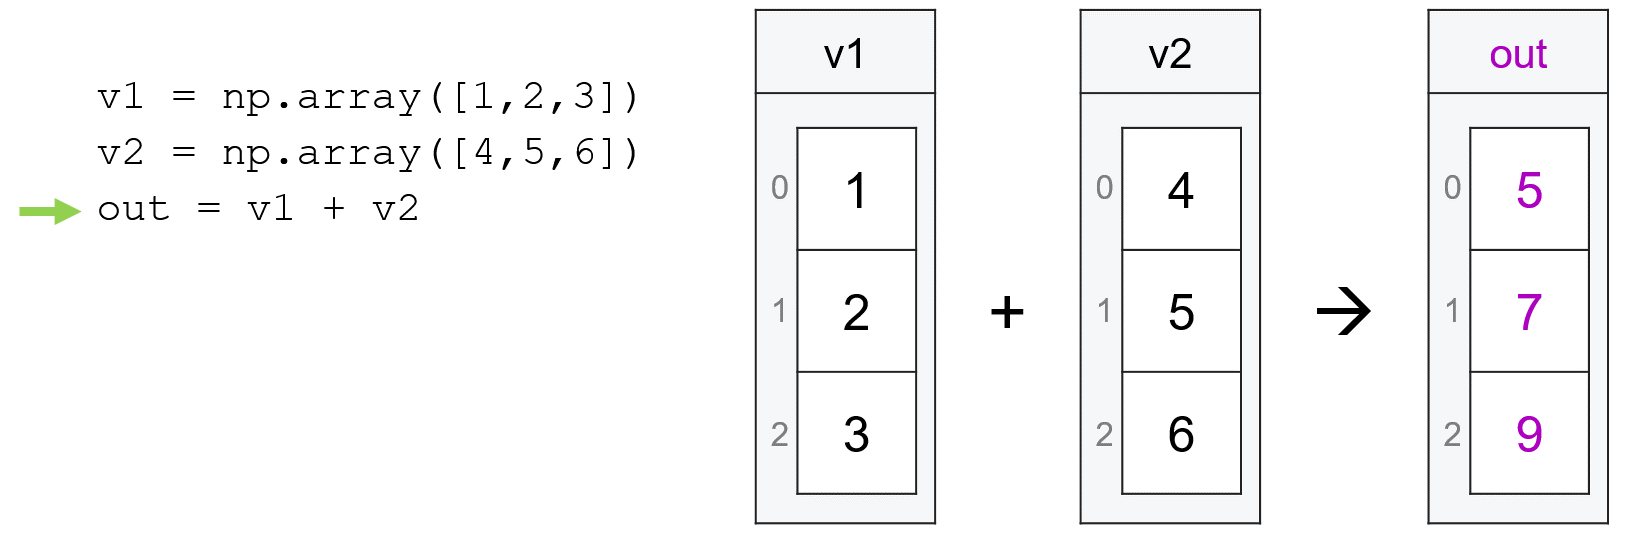

### Operations on scalars and arrays
In NumPy, if one of the operands in an operation is a scalar or a vector with a single element, NumPy employs broadcasting. This means the operation will be applied between that single value and every individual element of the longer vector, effectively extending the scalar or the single-element vector to match the shape of the other vector.

In [ ]:
v1 = np.array([1, 2, 3])
v1 + 1

array([2, 3, 4])

In [ ]:
v1 = np.array([1, 2, 3])
v1 + np.array([1])

array([2, 3, 4])

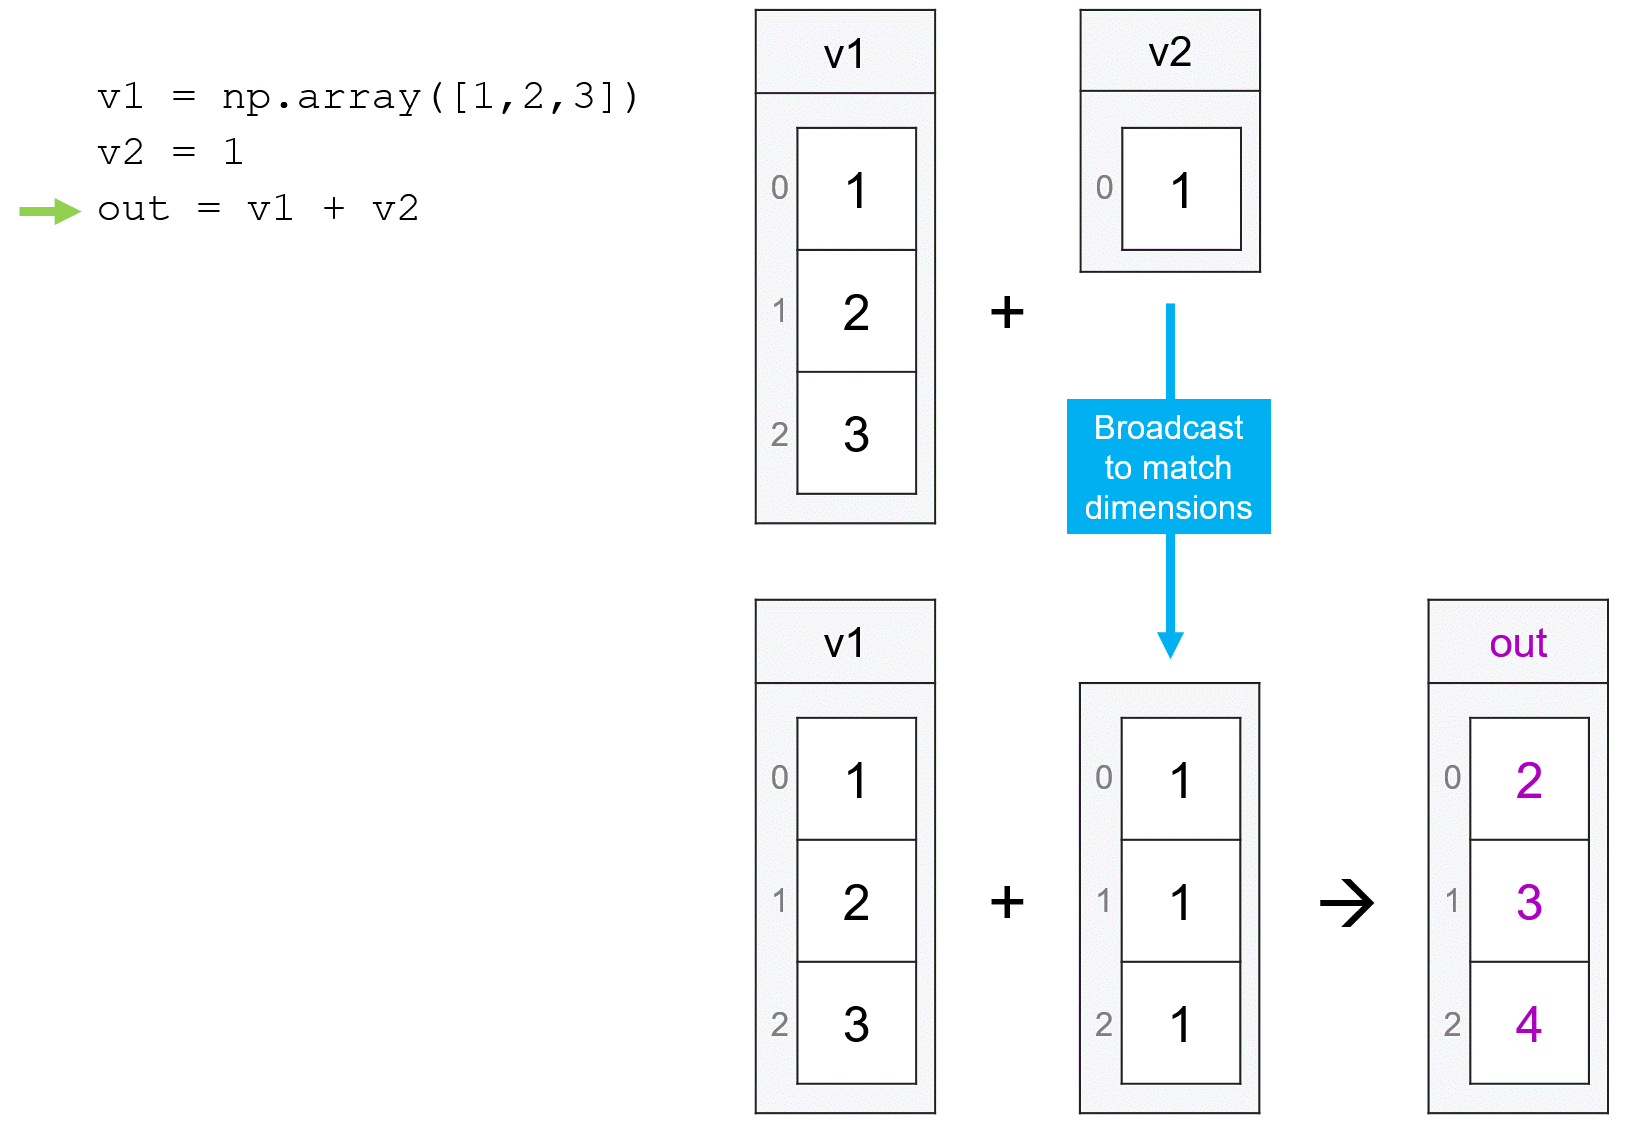

### Operations on a vector with a matrix


In [ ]:
my_vector = np.array([1, 2, 3])
my_matrix = np.array([[1, 2, 3], [4, 5, 6]])
my_matrix

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
array1 = np.array([[1, 2, 3], [4, 5, 6]])  # Shape: (2, 3)
array2 = np.array([10, 20, 30])           # Shape: (3,)
result = array1 + array2  # Broadcasting array2 across array1
print(result)

[[11 22 33]
 [14 25 36]]


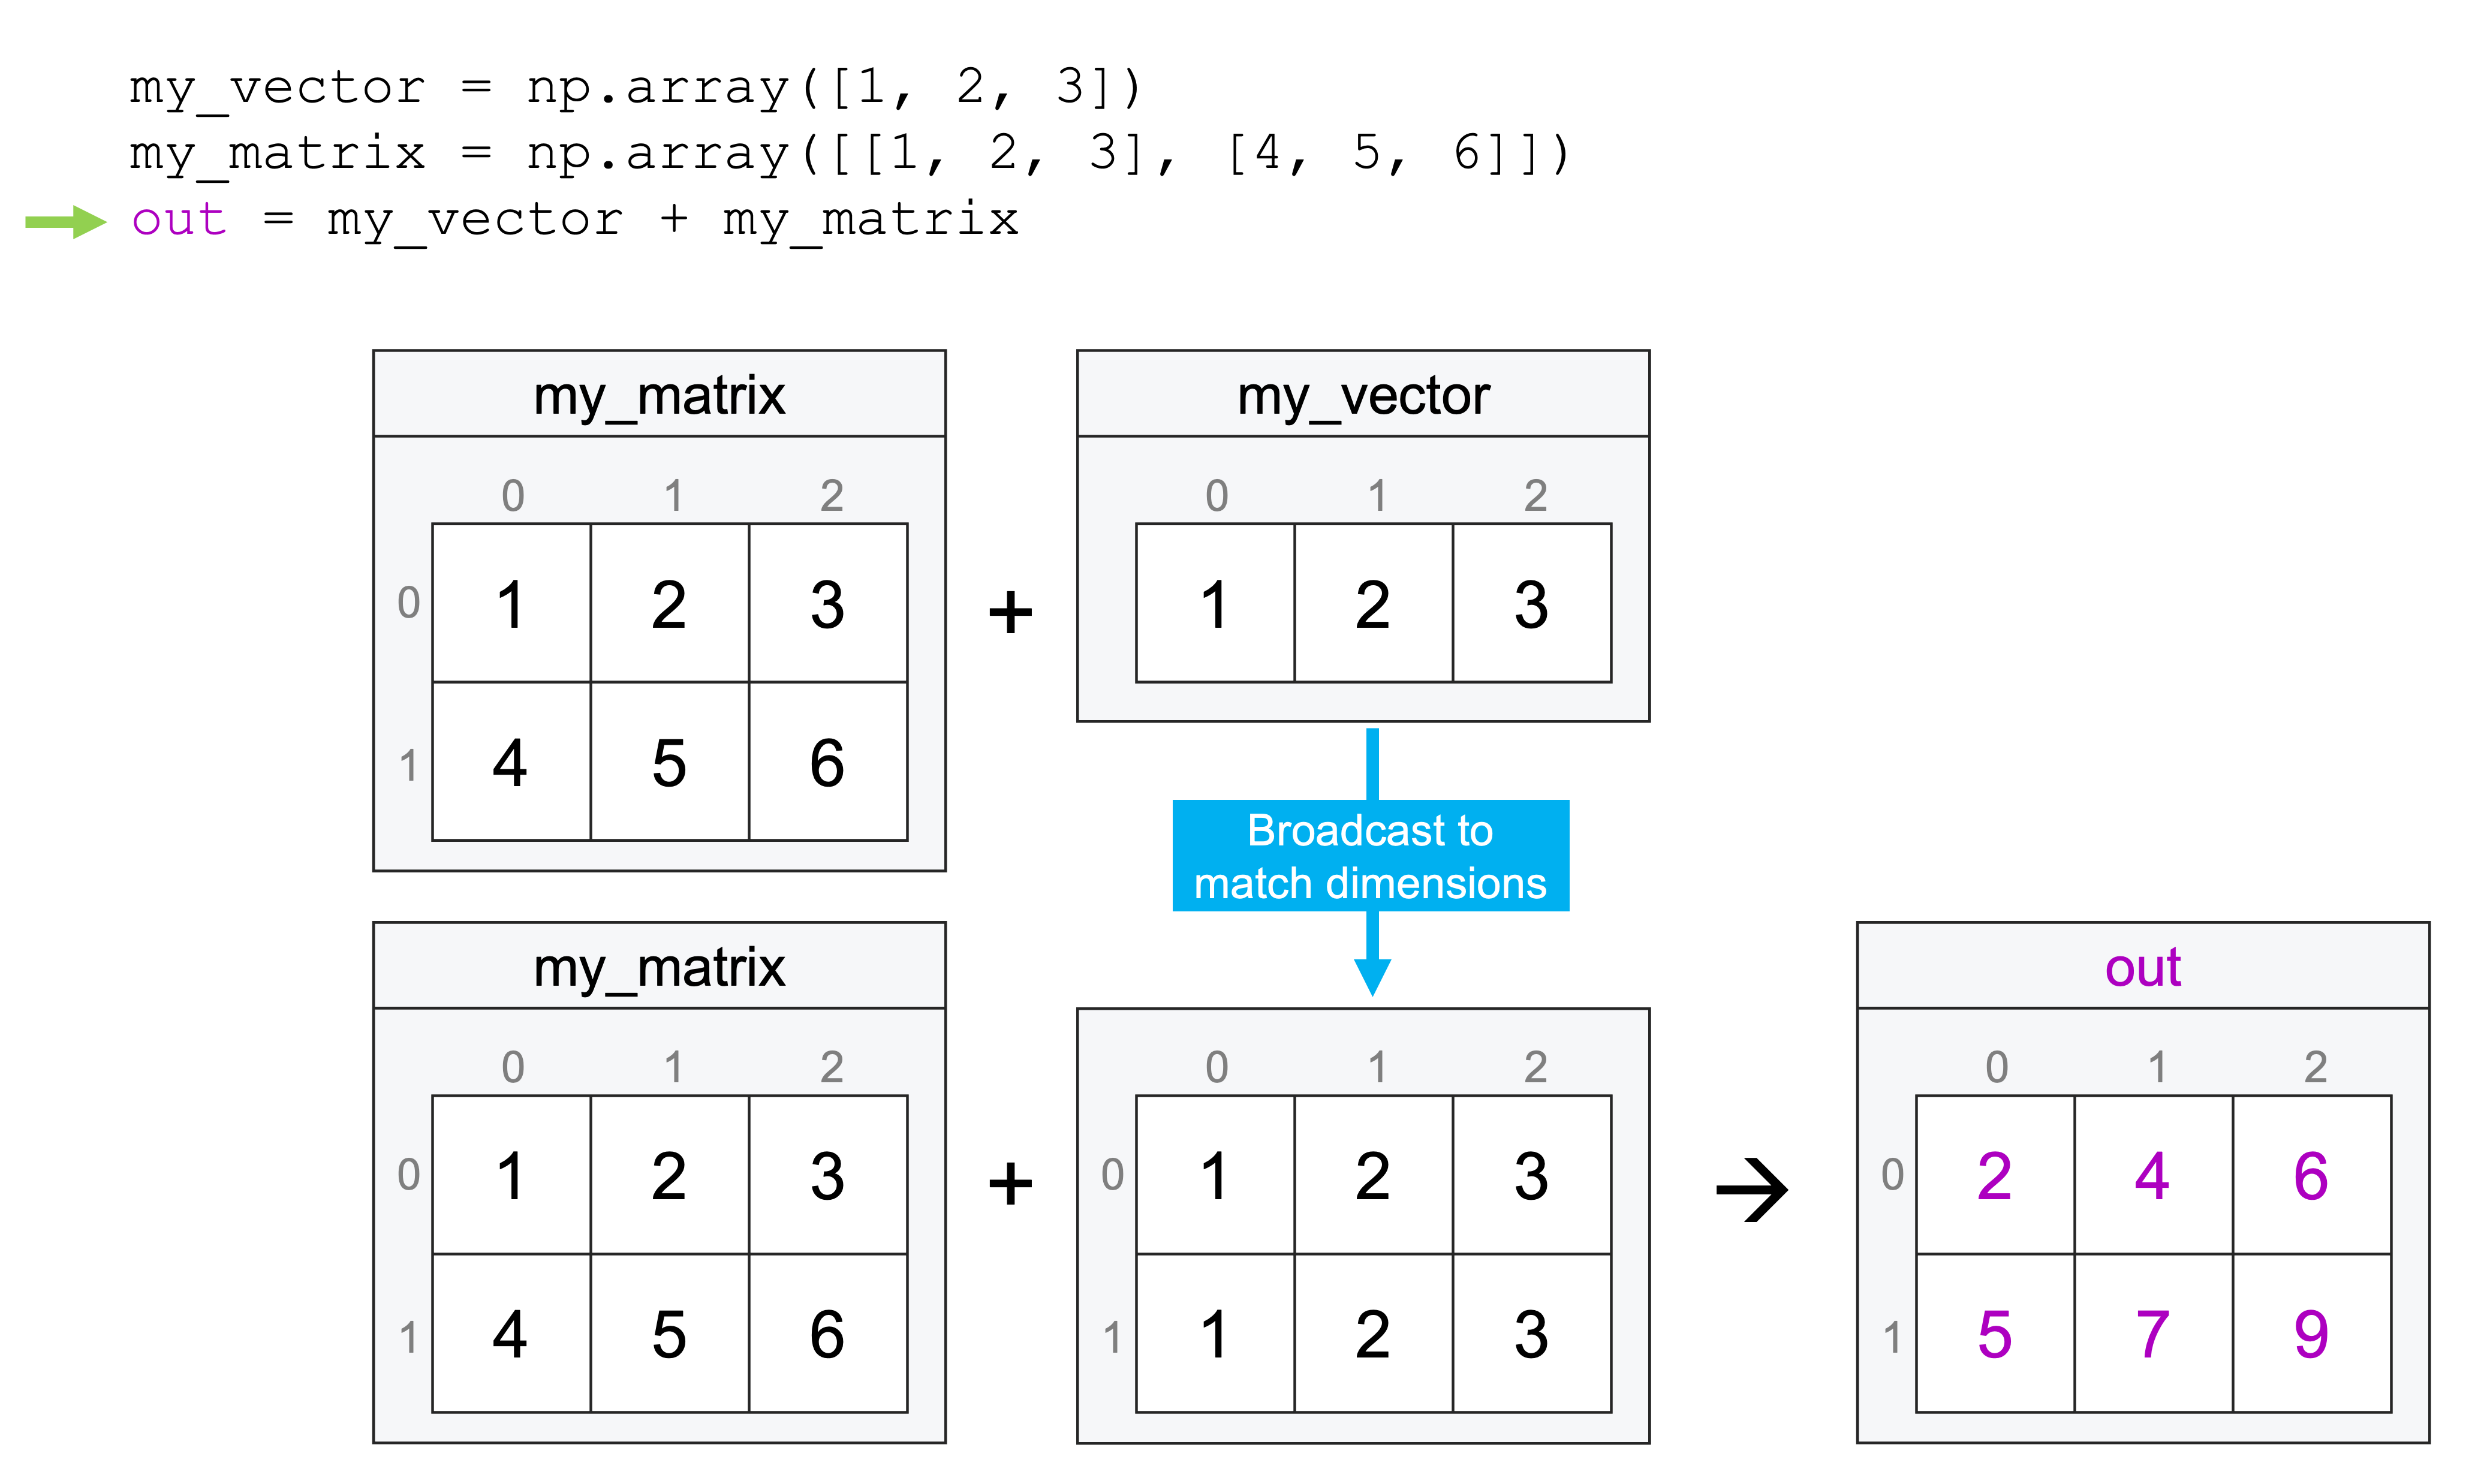

### Operations on a narrow matrix and a vector
A common issue related to broadcasting that people now run into is that, in NumPy, a distinction is made between a 1-dimensional vector and a 2-dimensional matrix with only 1 row or 1 column.


In [ ]:
my_vector = np.array([1, 2, 3])
my_vector, my_vector.shape

(array([1, 2, 3]), (3,))

In [ ]:
skinny_matrix = np.array([[1], [2], [3]])
skinny_matrix, skinny_matrix.shape

(array([[1],
        [2],
        [3]]),
 (3, 1))

In [ ]:
skinny_matrix + my_vector

array([[2, 3, 4],
       [3, 4, 5],
       [4, 5, 6]])

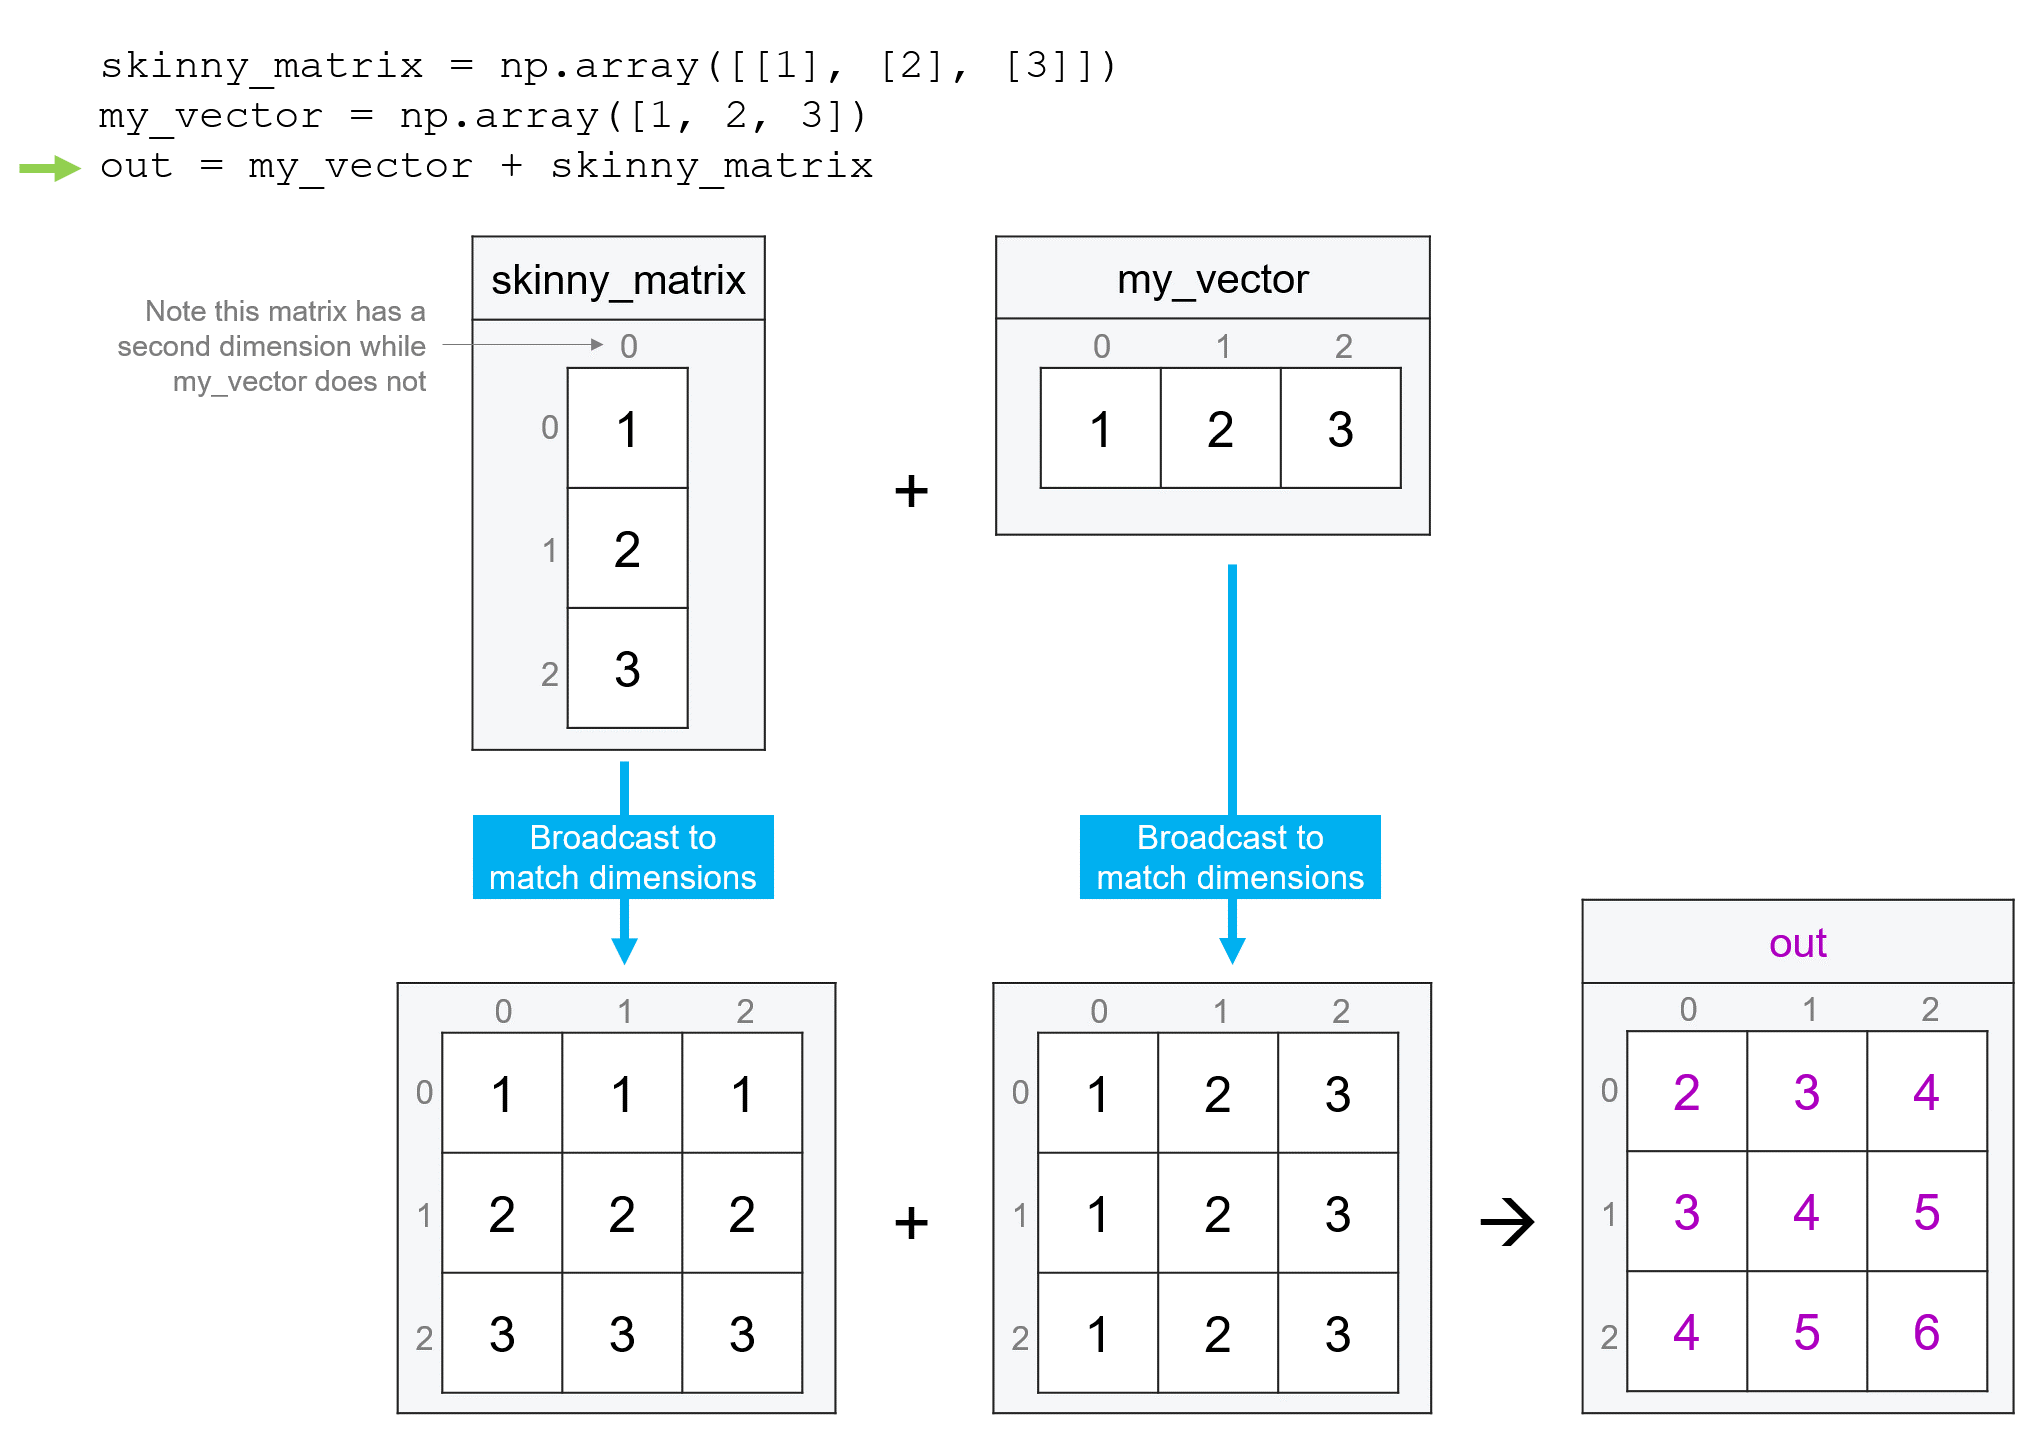

## Numpy where, any
NumPy provides powerful utility functions like where and any that allow conditional and logical operations over arrays. These functions are invaluable for data manipulation, filtering, and decision-making in numerical computing and real-life use cases.


In [ ]:
# Create an array
array = np.array([10, 15, 20, 25, 30])

# Find indices where values are greater than 20
indices = np.where(array > 20)
print("Indices where array > 20:", indices)

# Extract elements greater than 20
elements = array[indices]
print("Elements greater than 20:", elements)

Indices where array > 20: (array([3, 4]),)
Elements greater than 20: [25 30]


In [ ]:
# Replace values less than 20 with 0, others with 1
result = np.where(array < 20, 0, 1)
print("Conditional Replacement:\n", result)


Conditional Replacement:
 [0 0 1 1 1]


In [ ]:
# Create a boolean array
bool_array = np.array([False, False, True, False])

# Check if any value is True
result = np.any(bool_array)
print("Any value is True:", result)

Any value is True: True


In [ ]:
# Create a 2D array
array = np.array([[0, 0, 0], [1, 0, 0], [0, 0, 0]])

# Check along rows (axis=1)
row_check = np.any(array, axis=1)
print("Any value is True along rows:", row_check)

# Check along columns (axis=0)
col_check = np.any(array, axis=0)
print("Any value is True along columns:", col_check)

Any value is True along rows: [False  True False]
Any value is True along columns: [ True False False]
